<a href="https://colab.research.google.com/github/alonba/eeg-bss/blob/main/FastICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import mne as mne
import matplotlib.pyplot as plt

ELECTRODES_NUM = 35

# root_folder = r"C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\sep_11th"
root_folder = r"C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022"
file_ext = ".set"

In [3]:
# Fetch the data from the .set file
base_removed_eeglab_epochs = mne.io.read_epochs_eeglab(root_folder + r'\base_removed_short_35_electrodes_filtered_epoched_locations.set')
eeglab_epochs = mne.io.read_epochs_eeglab(root_folder + r'\short_35_electrodes_filtered_epoched_locations.set')

# Create the train set and test set
total_num_of_epochs = len(eeglab_epochs)

train_set_indexes = []
test_set_indexes = []
for i in range(total_num_of_epochs):
    random_num = np.random.rand()
    if (random_num < 0.8):  # 80% chance of being here
        train_set_indexes.append(i)
    else:
        test_set_indexes.append(i)

train_set = eeglab_epochs[train_set_indexes]
test_set = eeglab_epochs[test_set_indexes]
base_removed_train_set = base_removed_eeglab_epochs[train_set_indexes]
base_removed_test_set = base_removed_eeglab_epochs[test_set_indexes]

print(f"Total number of Epochs: {total_num_of_epochs}")
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

FileNotFoundError: File does not exist: C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\base_removed_short_35_electrodes_filtered_epoched_locations.set

In [9]:
# Export the Data
mne.export.export_epochs(root_folder + r'\train_set.set', train_set, overwrite=True)
mne.export.export_epochs(root_folder + r'\test_set.set', test_set, overwrite=True)
mne.export.export_epochs(root_folder + r'\base_removed_train_set.set', base_removed_train_set, overwrite=True)
mne.export.export_epochs(root_folder + r'\base_removed_test_set.set', base_removed_test_set, overwrite=True)

In [4]:
# Import the data
train_set = mne.io.read_epochs_eeglab(root_folder + r'\train_set.set')
test_set = mne.io.read_epochs_eeglab(root_folder + r'\test_set.set')
base_removed_train_set = mne.io.read_epochs_eeglab(root_folder + r'\base_removed_train_set.set')
base_removed_test_set = mne.io.read_epochs_eeglab(root_folder + r'\base_removed_test_set.set')

base_removed_train_set_left = base_removed_train_set['Left']
base_removed_train_set_right = base_removed_train_set['Right']
base_removed_train_set_no_move = base_removed_train_set['NoMove']

Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\train_set.set...
Not setting metadata
371 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\test_set.set...
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\base_removed_train_set.set...
Not setting metadata
371 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\base_removed_test_set.set...
Not setting metadata
91 mat

In [4]:
train_ica = mne.preprocessing.ICA(n_components = ELECTRODES_NUM, method='picard')  # Defaults to FastICA
train_ica.fit(train_set)
TRAIN_SET_NUM_OF_TRIALS, _ , NUM_OF_TIME_SAMPLES_IN_TRIAL = train_set.get_data().shape

test_ica = mne.preprocessing.ICA(n_components = ELECTRODES_NUM, method='picard')  # Defaults to FastICA
test_ica.fit(train_set)
TEST_SET_NUM_OF_TRIALS = train_set.get_data().shape[0]

train_ica.save(root_folder + r'\train_ica.fif')
test_ica.save(root_folder + r'\test_ica.fif')

Fitting ICA to data using 35 channels (please be patient, this may take a while)


C:\Users\alonb\AppData\Local\Temp\ipykernel_8720\471124920.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  train_ica.fit(train_set)


Selecting by number: 35 components
Fitting ICA took 18.7s.
Fitting ICA to data using 35 channels (please be patient, this may take a while)


C:\Users\alonb\AppData\Local\Temp\ipykernel_8720\471124920.py:6: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  test_ica.fit(train_set)


Selecting by number: 35 components
Fitting ICA took 32.0s.
Writing ICA solution to C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\sep_4th\train_ica.fif...
Writing ICA solution to C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\sep_4th\test_ica.fif...


<ICA | epochs decomposition, method: picard (fit in 148 iterations on 184500 samples), 35 ICA components explaining 100.0 % of variance (35 PCA components available), channel types: eeg, no sources marked for exclusion>

In [6]:
# Import ICA objects
train_ica = mne.preprocessing.read_ica(root_folder + r'\trimmed_train_ica.fif')
test_ica = mne.preprocessing.read_ica(root_folder + r'\trimmed_test_ica.fif')

Reading C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\trimmed_train_ica.fif ...
Now restoring ICA solution ...
Ready.
Reading C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\September\Sep-11-2022\trimmed_test_ica.fif ...
Now restoring ICA solution ...
Ready.


In [7]:
# train_set_left = train_set['Left']
# train_set_right = train_set['Right']
# train_set_no_move = train_set['NoMove']

# # Export the Data
# mne.export.export_epochs(root_folder + r'\train_set_left.set', train_set_left, overwrite=True)
# mne.export.export_epochs(root_folder + r'\train_set_right.set', train_set_right, overwrite=True)
# mne.export.export_epochs(root_folder + r'\train_set_no_move.set', train_set_no_move, overwrite=True)

# TRAIN_LEFT_NUM_OF_TRIALS = len(train_set_left.selection)
# TRAIN_RIGHT_NUM_OF_TRIALS = len(train_set_right.selection)
# TRAIN_NO_MOVE_NUM_OF_TRIALS = len(train_set_no_move.selection)

# train_left_data = train_set_left.get_data()
# train_right_data = train_set_right.get_data()
# train_no_move_data = train_set_no_move.get_data()

# train_left_data_swapped = np.swapaxes(train_left_data,0,1)
# train_right_data_swapped = np.swapaxes(train_right_data,0,1)
# train_no_move_data_swapped = np.swapaxes(train_no_move_data,0,1)

# reshaped_train_set_left = train_left_data_swapped.reshape((ELECTRODES_NUM, TRAIN_LEFT_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))
# reshaped_train_set_right = train_right_data_swapped.reshape((ELECTRODES_NUM, TRAIN_RIGHT_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))
# reshaped_train_set_no_move = train_no_move_data_swapped.reshape((ELECTRODES_NUM, TRAIN_NO_MOVE_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))

# train_ICs_left = train_ica.unmixing_matrix_ @ reshaped_train_set_left
# train_ICs_right = train_ica.unmixing_matrix_ @ reshaped_train_set_right
# train_ICs_no_move = train_ica.unmixing_matrix_ @ reshaped_train_set_no_move

# train_ICs_left_reshaped = train_ICs_left.reshape((ELECTRODES_NUM, TRAIN_LEFT_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# train_ICs_right_reshaped = train_ICs_right.reshape((ELECTRODES_NUM, TRAIN_RIGHT_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# train_ICs_no_move_reshaped = train_ICs_no_move.reshape((ELECTRODES_NUM, TRAIN_NO_MOVE_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# np.save('./data/train_ICs_left.npy', train_ICs_left_reshaped)
# np.save('./data/train_ICs_right.npy', train_ICs_right_reshaped)
# np.save('./data/train_ICs_no_move.npy', train_ICs_no_move_reshaped)


# train_ICs = np.concatenate((train_ICs_left_reshaped, train_ICs_right_reshaped, train_ICs_no_move_reshaped), axis=1)
# np.save('./data/train_ICS.npy', train_ICs) # save


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


In [12]:
# tmp_left = train_ica.mixing_matrix_ @ train_ICs_left
# tmp_reshaped = np.swapaxes(tmp_left.reshape((ELECTRODES_NUM, TRAIN_LEFT_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL)),0,1)
# x=2

In [90]:
# test_set_left = test_set['Left']
# test_set_right = test_set['Right']
# test_set_no_move = test_set['NoMove']


# # Export the Data
# mne.export.export_epochs(root_folder + r'\data\test_set_left.set', test_set_left, overwrite=True)
# mne.export.export_epochs(root_folder + r'\data\test_set_right.set', test_set_right, overwrite=True)
# mne.export.export_epochs(root_folder + r'\data\test_set_no_move.set', test_set_no_move, overwrite=True)


# TEST_LEFT_NUM_OF_TRIALS = len(test_set_left.selection)
# TEST_RIGHT_NUM_OF_TRIALS = len(test_set_right.selection)
# TEST_NO_MOVE_NUM_OF_TRIALS = len(test_set_no_move.selection)

# test_left_data = test_set_left.get_data()
# test_right_data = test_set_right.get_data()
# test_no_move_data = test_set_no_move.get_data()

# test_left_data_swapped = np.swapaxes(test_left_data,0,1)
# test_right_data_swapped = np.swapaxes(test_right_data,0,1)
# test_no_move_data_swapped = np.swapaxes(test_no_move_data,0,1)

# reshaped_test_set_left = test_left_data_swapped.reshape((ELECTRODES_NUM, TEST_LEFT_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))
# reshaped_test_set_right = test_right_data_swapped.reshape((ELECTRODES_NUM, TEST_RIGHT_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))
# reshaped_test_set_no_move = test_no_move_data_swapped.reshape((ELECTRODES_NUM, TEST_NO_MOVE_NUM_OF_TRIALS * NUM_OF_TIME_SAMPLES_IN_TRIAL))

# test_ICs_left = test_ica.unmixing_matrix_ @ reshaped_test_set_left
# test_ICs_right = test_ica.unmixing_matrix_ @ reshaped_test_set_right
# test_ICs_no_move = test_ica.unmixing_matrix_ @ reshaped_test_set_no_move

# test_ICs_left_reshaped = test_ICs_left.reshape((ELECTRODES_NUM, TEST_LEFT_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# test_ICs_right_reshaped = test_ICs_right.reshape((ELECTRODES_NUM, TEST_RIGHT_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# test_ICs_no_move_reshaped = test_ICs_no_move.reshape((ELECTRODES_NUM, TEST_NO_MOVE_NUM_OF_TRIALS, NUM_OF_TIME_SAMPLES_IN_TRIAL))
# np.save('./data/test_ICs_left.npy', test_ICs_left_reshaped)
# np.save('./data/test_ICs_right.npy', test_ICs_right_reshaped)
# np.save('./data/test_ICs_no_move.npy', test_ICs_no_move_reshaped)

# test_ICs = np.concatenate((test_ICs_left_reshaped, test_ICs_right_reshaped, test_ICs_no_move_reshaped), axis=1)
# np.save('./data/test_ICs.npy', test_ICs)


In [8]:
# train_labels_left = np.full((TRAIN_LEFT_NUM_OF_TRIALS),1)
# train_labels_right = np.full((TRAIN_RIGHT_NUM_OF_TRIALS),2)
# train_labels_no_move = np.full((TRAIN_NO_MOVE_NUM_OF_TRIALS),3)
# train_labels = np.concatenate((train_labels_left, train_labels_right, train_labels_no_move))
# np.save('./data/train_labels.npy', train_labels)


# test_labels_left = np.full((TEST_LEFT_NUM_OF_TRIALS),1)
# test_labels_right = np.full((TEST_RIGHT_NUM_OF_TRIALS),2)
# test_labels_no_move = np.full((TEST_NO_MOVE_NUM_OF_TRIALS),3)
# test_labels = np.concatenate((test_labels_left, test_labels_right, test_labels_no_move))
# np.save('./data/test_labels.npy', test_labels)


In [14]:
# # Load data
# train_ICS = np.load('./data/train_ICS.npy')
# test_ICs = np.load('./data/test_ICs.npy')
# train_labels = np.load('./data/train_labels.npy')
# test_labels = np.load('./data/test_labels.npy')

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
classifiers = []
for c in (0.5,0.6,0.7,0.8,0.9,1,1.1):
    classifiers.append(svm.SVC(C=c, kernel='sigmoid'))  # Good results with RBF (default) and Sigmoid. Defaults to C=1.
k = 5
scores = np.empty((ELECTRODES_NUM,len(classifiers),2))
for i in range(0, ELECTRODES_NUM, 1):
    for j in range(0,len(classifiers),1):
        score = cross_val_score(classifiers[j], train_ICS[i], train_labels, cv=k)
        scores[i,j] = [score.mean(), score.std()]
print(scores)
# scores = -np.sort(-np.array(scores), axis=0)
# accuracies = scores[:,0]
# print(f"Using K={k}, the mean value is {accuracies.mean()}. The Max is {accuracies.max()} and Min is {accuracies.min()}. The overall STD is {accuracies.std()}")

[[[0.47549056 0.05243522]
  [0.45916327 0.05305413]
  [0.45375787 0.04854002]
  [0.461903   0.04958547]
  [0.45372084 0.05599831]
  [0.44831544 0.05315464]
  [0.44831544 0.04960026]]

 [[0.44838949 0.04877159]
  [0.44838949 0.05238223]
  [0.44013328 0.05934189]
  [0.42117734 0.05093815]
  [0.4320622  0.04257199]
  [0.41843762 0.05573955]
  [0.42924843 0.05609387]]

 [[0.51921511 0.03214243]
  [0.5165124  0.03414996]
  [0.51373565 0.03131206]
  [0.51106997 0.03776114]
  [0.51925213 0.05404239]
  [0.50844132 0.05600757]
  [0.50833025 0.04013779]]

 [[0.44013328 0.05182387]
  [0.44831544 0.05033122]
  [0.45109219 0.0496762 ]
  [0.45112921 0.04096543]
  [0.44842651 0.03788349]
  [0.44583488 0.04330662]
  [0.45124028 0.03227886]]

 [[0.41007034 0.04341155]
  [0.39655683 0.02772832]
  [0.38578304 0.01638214]
  [0.39663088 0.02731097]
  [0.38026657 0.02611087]
  [0.38022954 0.0331488 ]
  [0.39655683 0.03149647]]

 [[0.45923732 0.03940566]
  [0.45116623 0.0334338 ]
  [0.44835246 0.01849055]
  

<BarContainer object of 35 artists>

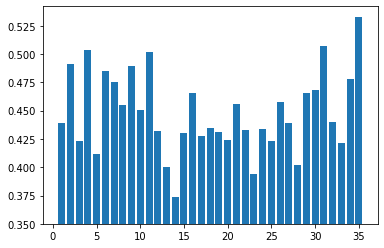

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

k = 35
scores = np.empty(ELECTRODES_NUM)
for i in range(ELECTRODES_NUM):
    clf = svm.SVC(C=0.7)
    score = cross_val_score(clf, train_ICS[i], train_labels, cv=k)
    scores[i] = score.mean()

x = np.arange(ELECTRODES_NUM) 
bottom = 0.35
plt.bar(x,scores-bottom,bottom=bottom)


In [10]:
train_ica = mne.preprocessing.read_ica(root_folder + r'\train_ica.fif')
train_set_left = mne.io.read_epochs_eeglab(root_folder + r'\train_set_left.set')
train_set_right = mne.io.read_epochs_eeglab(root_folder + r'\train_set_right.set')
train_set_no_move = mne.io.read_epochs_eeglab(root_folder + r'\train_set_no_move.set')

train_left_reconstructed = []
train_right_reconstructed = []
train_no_move_reconstructed = []
for i in range(ELECTRODES_NUM):
    train_left_reconstructed.append(train_ica.apply(train_set_left.copy(),include=i).get_data())
    train_right_reconstructed.append(train_ica.apply(train_set_right.copy(),include=i).get_data())
    train_no_move_reconstructed.append(train_ica.apply(train_set_no_move.copy(),include=i).get_data())
train_left_reconstructed = np.mean(np.array(train_left_reconstructed), axis = 1)
train_right_reconstructed = np.mean(np.array(train_right_reconstructed), axis = 1)
train_no_move_reconstructed = np.mean(np.array(train_no_move_reconstructed), axis = 1)


left_sources_data = np.swapaxes(train_ica.get_sources(train_set_left).get_data(),0,1)
right_sources_data = np.swapaxes(train_ica.get_sources(train_set_right).get_data(),0,1)
no_move_sources_data = np.swapaxes(train_ica.get_sources(train_set_no_move).get_data(),0,1)

sources_data = np.concatenate((left_sources_data, right_sources_data, no_move_sources_data), axis=1)

Reading C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_ica.fif ...
Now restoring ICA solution ...
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_left.set...
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_right.set...
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set_no_move.set...
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying ICA to Epochs instance
    Transforming to ICA space (35 components)
    Zeroing out 34 IC

For IC 0 the score is 0.32128312265298564.
For IC 1 the score is 0.4477177764848998.
For IC 2 the score is 0.34569207171946903.
For IC 3 the score is 0.48177923520389276.
For IC 4 the score is 0.407108478341355.
For IC 5 the score is 0.46921246099328295.
For IC 6 the score is 0.40570159200296185.
For IC 7 the score is 0.3558576188713175.
For IC 8 the score is 0.40827206854604114.
For IC 9 the score is 0.4044216427778072.
For IC 10 the score is 0.418072671497329.
For IC 11 the score is 0.3856613952504363.
For IC 12 the score is 0.37299412915851277.
For IC 13 the score is 0.4919923837732057.
For IC 14 the score is 0.3661236579044798.
For IC 15 the score is 0.36640926640926635.
For IC 16 the score is 0.3416512402813773.
For IC 17 the score is 0.4290157084677632.
For IC 18 the score is 0.3506637753213096.
For IC 19 the score is 0.40186174432749766.
For IC 20 the score is 0.4278521182630772.
For IC 21 the score is 0.4181414291003332.
For IC 22 the score is 0.41229174379859307.
For IC 23 the

<BarContainer object of 35 artists>

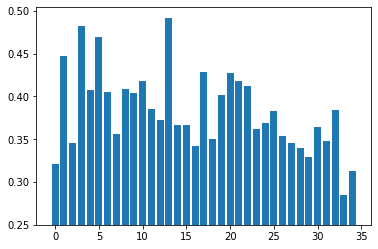

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

classifiers = []
for c in (0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1):
    # Good results with RBF (default) and Sigmoid. Defaults to C=1.
    # classifiers.append(svm.SVC(C=c))  
    classifiers.append(svm.SVC(C=c, kernel="sigmoid"))
k = 5
# scores = np.empty((ELECTRODES_NUM,len(classifiers),2))
scores = np.empty((ELECTRODES_NUM, len(classifiers)))
for i in range(ELECTRODES_NUM):
    for j in range(0,len(classifiers),1):
        score = cross_val_score(classifiers[j], sources_data[i], train_labels, cv=k)
        # scores[i,j] = [score.mean(), score.std()]
        scores[i,j] = score.mean()
scores = np.mean(scores, axis=1)
for i in range(ELECTRODES_NUM):
    print(f"For IC {i} the score is {scores[i]}.")
bottom = 0.25
x = np.arange(ELECTRODES_NUM)
plt.bar(x, scores-bottom, bottom=bottom)

# print(scores)
# scores = -np.sort(-np.array(scores), axis=0)
# accuracies = scores[:,0]
# print(f"Using K={k}, the mean value is {accuracies.mean()}. The Max is {accuracies.max()} and Min is {accuracies.min()}. The overall STD is {accuracies.std()}")

In [16]:
trimmed_sources = sources_data[:,:,50:350]
selected = np.concatenate((trimmed_sources[2], trimmed_sources[3]), axis = 0)
double_train_labels = np.concatenate((train_labels,train_labels))

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

k = 5
x = np.arange(ELECTRODES_NUM)
bottom = 0.25
idxs = range(ELECTRODES_NUM)
scores = np.zeros((ELECTRODES_NUM,ELECTRODES_NUM))
for idx1 in idxs:
    for idx2 in idxs:
        # selected = trimmed_sources[idx1] + trimmed_sources[idx2]
        # selected = sources_data[idx1] + sources_data[idx2]
        clf = svm.SVC(C=0.7)
        if (idx1 == idx2):
            selected = trimmed_sources[idx1]
            scores[idx1,idx1] = cross_val_score(clf, selected, train_labels, cv=k).mean()
        else:
            selected = np.concatenate((trimmed_sources[idx1], trimmed_sources[idx2]), axis = 0)
            scores[idx1,idx2] = cross_val_score(clf, selected, double_train_labels, cv=k).mean()
print(scores)

[[0.4077749  0.4212631  0.40899982 ... 0.39134032 0.34501747 0.3681743 ]
 [0.40349329 0.47863754 0.42257768 ... 0.39132193 0.39937489 0.38571429]
 [0.40086413 0.41038794 0.38885598 ... 0.3737176  0.33560397 0.32881964]
 ...
 [0.40356683 0.388656   0.37902188 ... 0.35579415 0.3640467  0.361344  ]
 [0.34514617 0.39009928 0.35330943 ... 0.3451002  0.29363199 0.32069314]
 [0.37367163 0.37105166 0.35057915 ... 0.39272844 0.34240669 0.33132173]]


In [18]:
import pandas as pd

## convert your array into a dataframe
scores_pandas_df = pd.DataFrame (scores)

## save to xlsx file
filepath = 'classifiers_accuracy/trimmed_concat_736_trials_ICs.xlsx'

scores_pandas_df.to_excel(filepath, index=False)

In [ ]:
idx_1 = 5
idx_2 = 10
selected = sources_data[idx_1] + sources_data[idx_2]
# selected = sources_data[13] + sources_data[5] + sources_data[3]

classifiers = []
for c in (0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1):
    classifiers.append(svm.SVC(C=c))
k = 5
bottom = 0.25
x = np.arange(ELECTRODES_NUM)
scores = np.empty(len(classifiers))
for j in range(len(classifiers)):
    scores[j] = cross_val_score(classifiers[j], selected, train_labels, cv=k).mean()
scores = np.mean(scores)
print(f"For IC {idx_1} combined with IC {idx_2} the score is {scores}")


In [1]:
idx_1 = 1
idx_2 = 3
idx_3 = 5
idx_4 = 13
selected = sources_data[idx_1] + sources_data[idx_2] + sources_data[idx_3] + sources_data[idx_4]
# selected = sources_data[13] + sources_data[5] + sources_data[3]

classifiers = []
for c in (0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1):
    classifiers.append(svm.SVC(C=c))
k = 5
bottom = 0.25
x = np.arange(ELECTRODES_NUM) + 1
scores = np.empty(len(classifiers))
for j in range(0,len(classifiers),1):
    scores[j] = cross_val_score(classifiers[j], selected, train_labels, cv=k).mean()
scores = np.mean(scores)
print(f"For ICs {idx_1}, {idx_2}, {idx_3} and {idx_4} combined - the score is {scores}")


NameError: name 'sources_data' is not defined

In [51]:
train_left_selected = train_ica.apply(train_set_left.copy(),include=[1,3]).get_data()
train_right_selected = train_ica.apply(train_set_right.copy(),include=[1,3]).get_data()
train_no_move_selected = train_ica.apply(train_set_no_move.copy(),include=[1,3]).get_data()
train_left_selected = np.mean(np.array(train_left_selected), axis = 0)
train_right_selected = np.mean(np.array(train_right_selected), axis = 0)
train_no_move_selected = np.mean(np.array(train_no_move_selected), axis = 0)


TIME_POINTS_NUM = 5

for ic in range(ELECTRODES_NUM):
    fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)
    fig.suptitle(f"IC {ic}", fontsize=16)
    ax[0,0].set_ylabel('Left')
    ax[1,0].set_ylabel('Right')
    ax[2,0].set_ylabel('No Movement')
    tmp_time_points = np.array(range(TIME_POINTS_NUM)) * 100 + 50
    voltages = [train_left_selected[ic,:,tmp_time_points],
                train_right_selected[ic,:,tmp_time_points],
                train_no_move_selected[ic,:,tmp_time_points]]
    v_min = np.min(voltages)
    v_max = np.max(voltages)
    for time_point_idx in range(TIME_POINTS_NUM):
        time_point = time_point_idx * 100 + 50
        mne.viz.plot_topomap(train_left_selected[ic,:,time_point], train_set_left.info, vmin=v_min, vmax=v_max, axes=ax[0,time_point_idx], show=False)
        ax[0,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(train_right_selected[ic,:,time_point], train_set_right.info, vmin=v_min, vmax=v_max, axes=ax[1,time_point_idx], show=False)
        ax[1,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(train_no_move_selected[ic,:,time_point], train_set_no_move.info, vmin=v_min, vmax=v_max, axes=ax[2,time_point_idx], show=False)
        ax[2,time_point_idx].set_title(str(time_point))

Applying ICA to Epochs instance
    Transforming to ICA space (35 components)
    Zeroing out 33 ICA components
    Projecting back using 35 PCA components
Applying ICA to Epochs instance
    Transforming to ICA space (35 components)
    Zeroing out 33 ICA components
    Projecting back using 35 PCA components
Applying ICA to Epochs instance
    Transforming to ICA space (35 components)
    Zeroing out 33 ICA components
    Projecting back using 35 PCA components


C:\Users\alonb\AppData\Local\Temp\ipykernel_11204\2963160608.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)


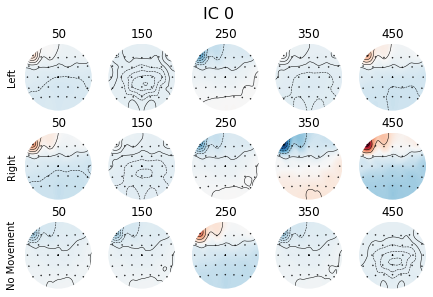

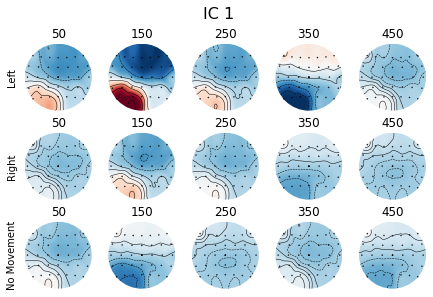

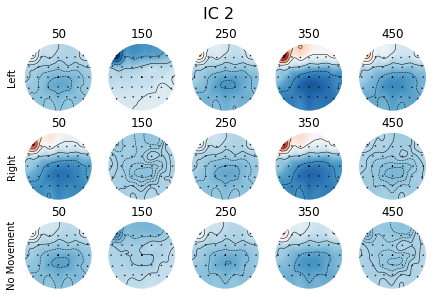

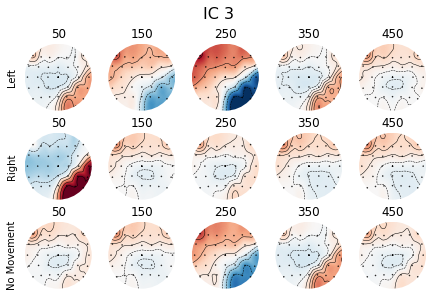

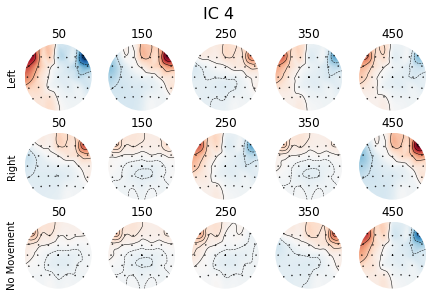

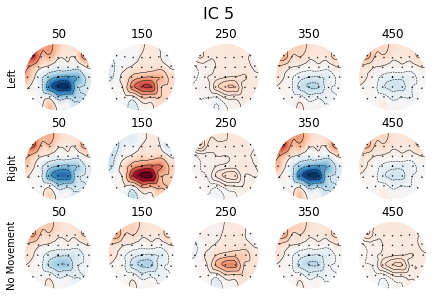

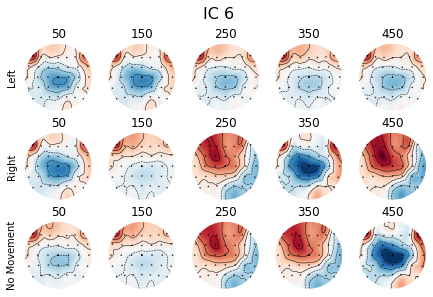

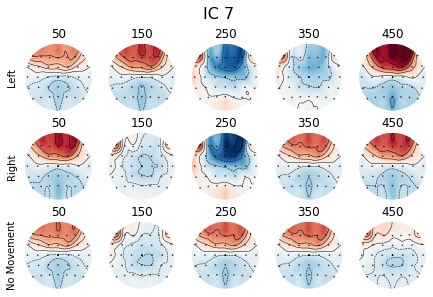

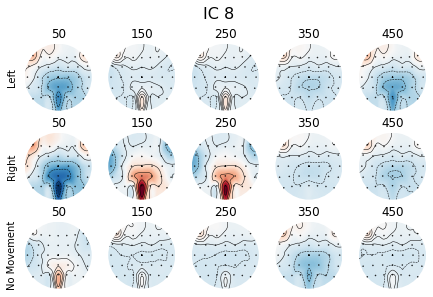

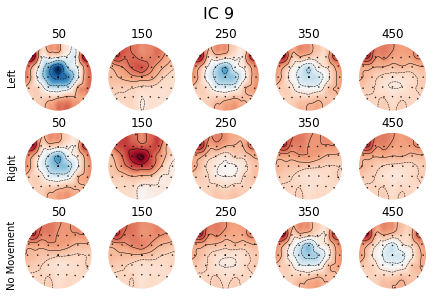

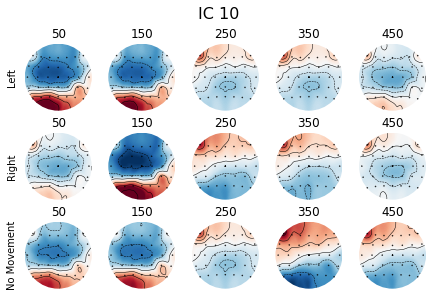

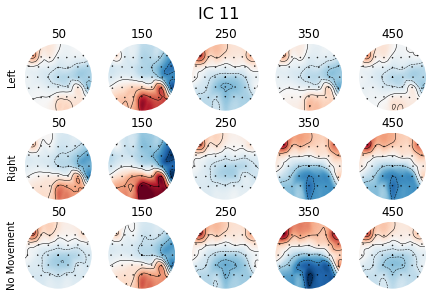

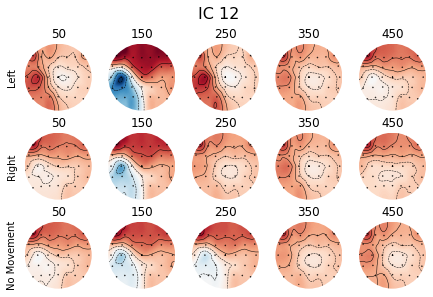

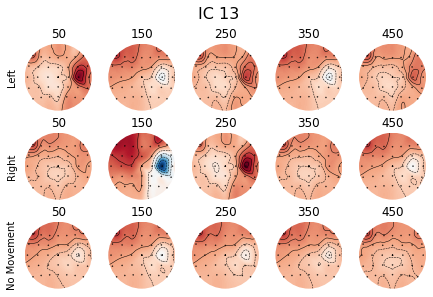

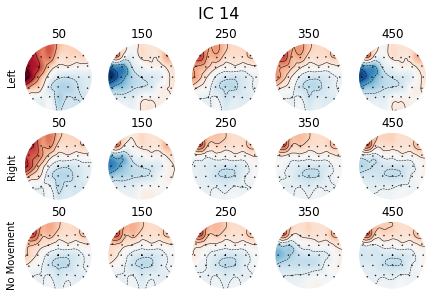

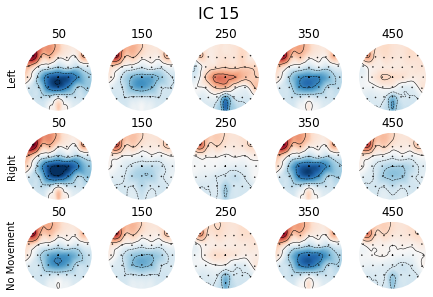

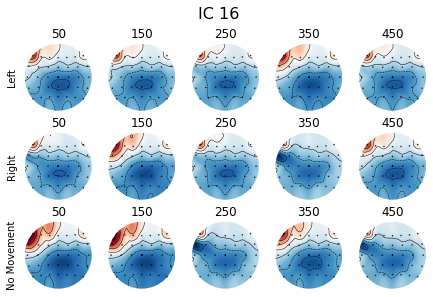

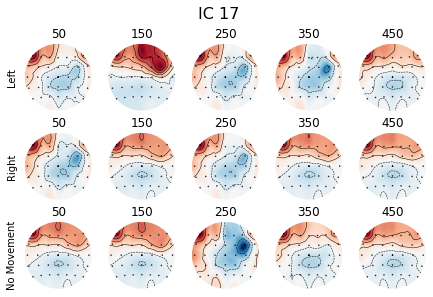

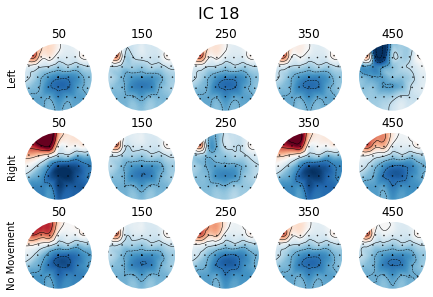

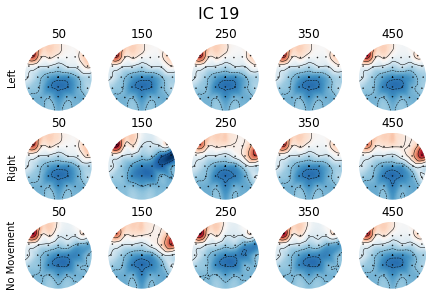

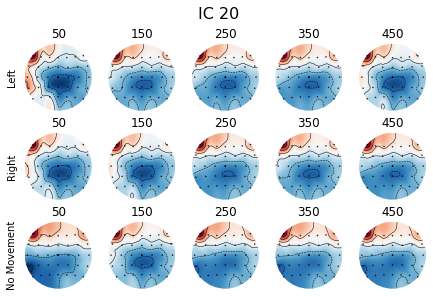

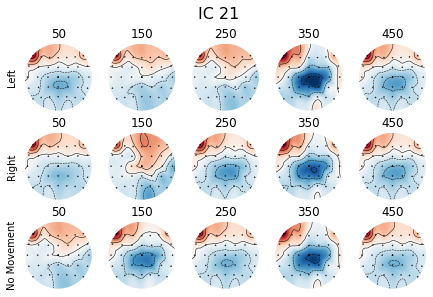

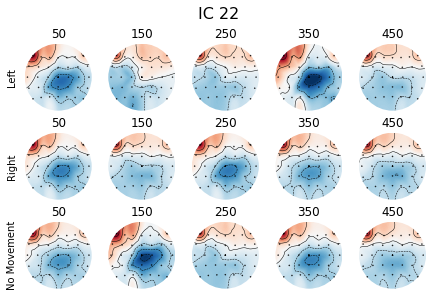

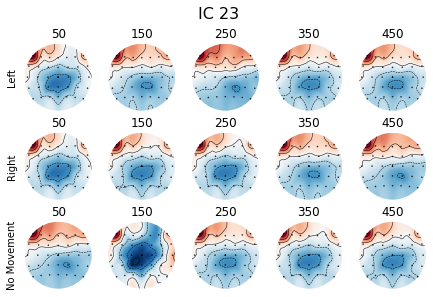

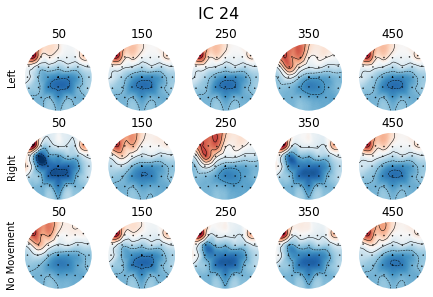

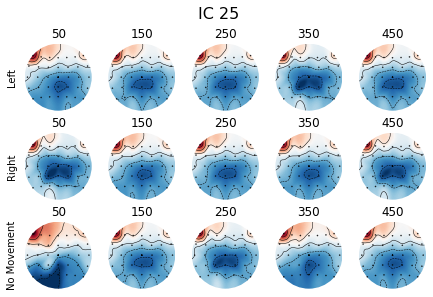

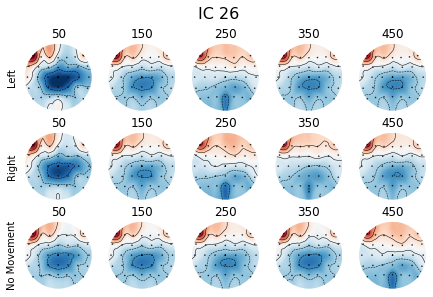

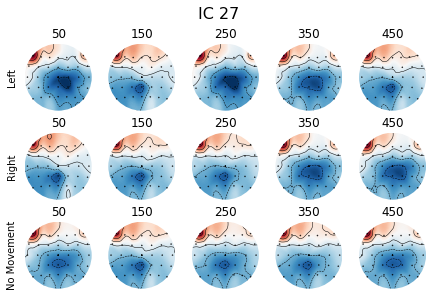

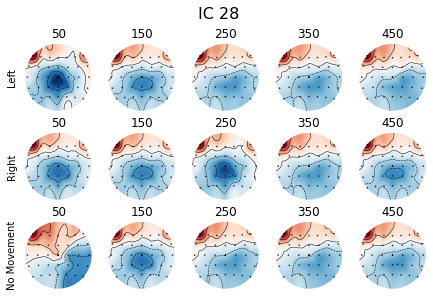

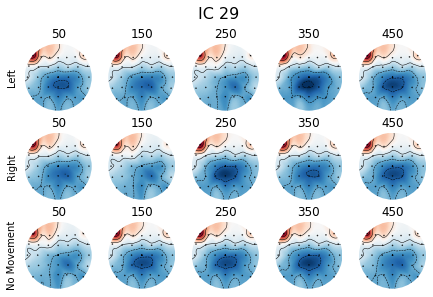

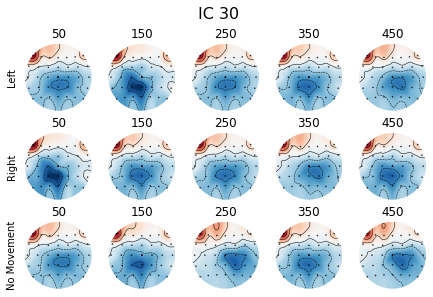

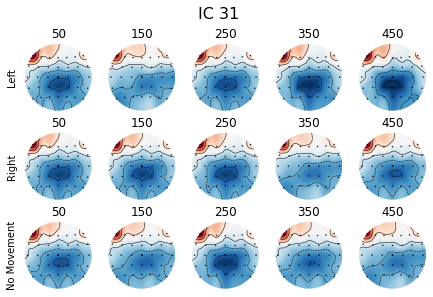

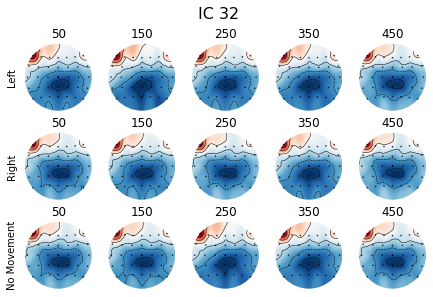

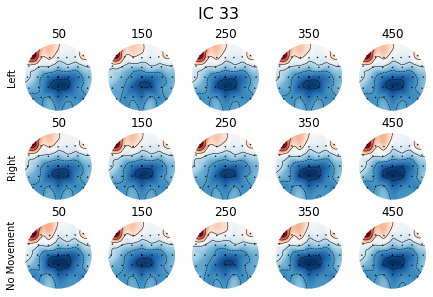

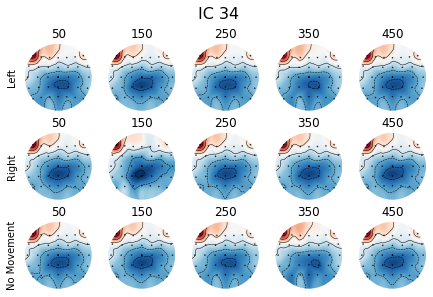

In [21]:
TIME_POINTS_NUM = 5

for ic in range(ELECTRODES_NUM):
    fig, ax = plt.subplots(nrows = 3, ncols = TIME_POINTS_NUM, constrained_layout=True)
    fig.suptitle(f"IC {ic}", fontsize=16)
    ax[0,0].set_ylabel('Left')
    ax[1,0].set_ylabel('Right')
    ax[2,0].set_ylabel('No Movement')
    tmp_time_points = np.array(range(TIME_POINTS_NUM)) * 100 + 50
    voltages = [train_left_reconstructed[ic,:,tmp_time_points],
                train_right_reconstructed[ic,:,tmp_time_points],
                train_no_move_reconstructed[ic,:,tmp_time_points]]
    v_min = np.min(voltages)
    v_max = np.max(voltages)
    for time_point_idx in range(TIME_POINTS_NUM):
        time_point = time_point_idx * 100 + 50
        mne.viz.plot_topomap(train_left_reconstructed[ic,:,time_point], train_set_left.info, vmin=v_min, vmax=v_max, axes=ax[0,time_point_idx], show=False)
        ax[0,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(train_right_reconstructed[ic,:,time_point], train_set_right.info, vmin=v_min, vmax=v_max, axes=ax[1,time_point_idx], show=False)
        ax[1,time_point_idx].set_title(str(time_point))
        mne.viz.plot_topomap(train_no_move_reconstructed[ic,:,time_point], train_set_no_move.info, vmin=v_min, vmax=v_max, axes=ax[2,time_point_idx], show=False)
        ax[2,time_point_idx].set_title(str(time_point))

In [21]:
### Export the projected data to .set files, EEGLAB format

# for i in range(ELECTRODES_NUM):
#     mne.export.export_epochs(root_folder+train_sub_folder+r"\left"+file_name+str(i)+file_ext,train_left_reconstructed[i])
#     mne.export.export_epochs(root_folder+train_sub_folder+r"\right"+file_name+str(i)+file_ext,train_right_reconstructed[i])
#     mne.export.export_epochs(root_folder+train_sub_folder+r"\no_move"+file_name+str(i)+file_ext,train_no_move_reconstructed[i])

In [ ]:
# test_set = mne.io.read_epochs_eeglab(root_folder+r'\data\test_set.set')
# test_ica = mne.preprocessing.ICA(n_components=ELECTRODES_NUM)  # Defaults to FastICA
# test_ica.fit(test_set)

# test_set_left=test_set['Left']
# test_set_right=test_set['Right']
# test_set_no_move=test_set['NoMove']

# test_left_reconstructed = []
# test_right_reconstructed = []
# test_no_move_reconstructed = []
# for i in range(ELECTRODES_NUM):
#     tmp_test_left = test_set_left.copy()
#     tmp_test_right = test_set_right.copy()
#     tmp_test_no_move = test_set_no_move.copy()
#     test_left_reconstructed.append(test_ica.apply(tmp_test_left,include=i))
#     test_right_reconstructed.append(test_ica.apply(tmp_test_right,include=i))
#     test_no_move_reconstructed.append(test_ica.apply(tmp_test_no_move,include=i))
    
# # Export the projected data to .set files, EEGLAB format
# for i in range(ELECTRODES_NUM):
#     mne.export.export_epochs(root_folder+test_sub_folder+r"\left"+file_name+str(i)+file_ext,test_left_reconstructed[i])
#     mne.export.export_epochs(root_folder+test_sub_folder+r"\right"+file_name+str(i)+file_ext,test_right_reconstructed[i])
#     mne.export.export_epochs(root_folder+test_sub_folder+r"\no_move"+file_name+str(i)+file_ext,test_no_move_reconstructed[i])

In [ ]:
# ### Import the projected data

# train_left_reconstructed=[]
# train_right_reconstructed=[]
# train_no_move_reconstructed=[]
# test_left_reconstructed=[]
# test_right_reconstructed=[]
# test_no_move_reconstructed=[]
# for i in range(ELECTRODES_NUM):
#     train_left_reconstructed.append(mne.read_epochs_eeglab(root_folder+train_sub_folder+r"\left"+file_name+str(i)+file_ext))
#     train_right_reconstructed.append(mne.read_epochs_eeglab(root_folder+train_sub_folder+r"\right"+file_name+str(i)+file_ext))
#     train_no_move_reconstructed.append(mne.read_epochs_eeglab(root_folder+train_sub_folder+r"\no_move"+file_name+str(i)+file_ext))
#     test_left_reconstructed.append(mne.read_epochs_eeglab(root_folder+test_sub_folder+r"\left"+file_name+str(i)+file_ext))
#     test_right_reconstructed.append(mne.read_epochs_eeglab(root_folder+test_sub_folder+r"\right"+file_name+str(i)+file_ext))
#     test_no_move_reconstructed.append(mne.read_epochs_eeglab(root_folder+test_sub_folder+r"\no_move"+file_name+str(i)+file_ext))